# Optimasi Portofolio dengan NSGA-II


In [1]:
%load_ext autoreload
%autoreload 2

## **A. Pengumpulan Dataset**
Dataset pada penelitian ini diperoleh melalui Yahoo Finance menggunakan library yfinance. Tujuannya adalah menyediakan data harga historis yang bersih dan konsisten untuk keperluan optimisasi portofolio.

### 1. Pemilihan Saham (LQ45)
Penelitian menggunakan 15 saham dari indeks LQ45 karena:
- Likuiditas tinggi
- Kapitalisasi besar
- Stabil untuk dianalisis
- Mewakili sektor yang beragam

Emiten yang digunakan antara lain: perbankan (BBCA, BBRI, BMRI, BBNI), telekomunikasi (TLKM), industri dasar, energi, consumer goods, dan lainnya.

### 2. Periode Penelitian
Rentang waktu yang digunakan adalah 1 November 2022 sampai 1 November 2025. Periode ini dipilih karena:
- memberikan cakupan historis yang cukup panjang untuk menangkap perubahan tren dan volatilitas,
- mencakup fase pemulihan ekonomi pascapandemi, fluktuasi komoditas, serta dinamika pasar global,
- bersifat fixed, sehingga hasil penelitian dapat direplikasi secara konsisten.

### 3. Sifat Data yang Diambil
Data yang digunakan adalah harga penutupan harian yang sudah disesuaikan (adjusted close). Data ini dianggap lebih representatif untuk analisis risiko-return karena telah memperhitungkan aksi korporasi seperti:

- stock split,
- dividen,
- maupun penyesuaian teknis lainnya.

Dengan cara ini, pola pergerakan harga yang dianalisis lebih stabil dan tidak bias terhadap perubahan struktural.

### 4. Pertimbangan Kualitas Data
Dalam pengumpulan dataset, beberapa hal juga diperhatikan:

- Likuiditas: saham yang terlalu sering tidak diperdagangkan berpotensi menghasilkan noise atau missing values.
- Kebersihan data: adanya hari libur atau suspensi perdagangan membuat beberapa data perlu dibersihkan agar time series tetap konsisten.
- Stabilitas return: dataset yang bersih membantu memastikan bahwa hasil optimisasi tidak bias akibat outlier teknis.

In [2]:
from src.dataset import download_data, process_data
import datetime

# 15 well-known ticker from LQ45
tickers = [
    'BBCA.JK', # Bank Central Asia
    'BBRI.JK', # Bank Rakyat Indonesia
    'BMRI.JK', # Bank Mandiri
    'BBNI.JK', # Bank Negara Indonesia
    'TLKM.JK', # Telkom Indonesia
    'ASII.JK', # Astra International
    'BYAN.JK', # Bayan Resources
    'TPIA.JK', # Chandra Asri
    'AMRT.JK', # Sumber Alfaria Trijaya
    'GOTO.JK', # GoTo Gojek Tokopedia
    'MDKA.JK', # Merdeka Copper Gold
    'ADRO.JK', # Adaro Energy
    'ICBP.JK', # Indofood CBP
    'UNVR.JK', # Unilever Indonesia
    'KLBF.JK'  # Kalbe Farma
]

# Take 3years ago to today
start_date = datetime.date(2022, 11, 1)
end_date = datetime.date(2025, 11, 1)

# Dataset
df = download_data(tickers, start_date, end_date)
r_matrix, mu_vector = process_data(df)

========== Downloading Data ==========


[*********************100%***********************]  15 of 15 completed

Successfully download and cleaning data!
========== End ==========
========== Processing Data ==========
----- Vector expected return (mu): -----
Ticker
ADRO.JK    0.000688
AMRT.JK   -0.000082
ASII.JK    0.000484
BBCA.JK    0.000192
BBNI.JK    0.000350
BBRI.JK    0.000251
BMRI.JK    0.000369
BYAN.JK    0.001724
GOTO.JK   -0.000871
ICBP.JK    0.000087
KLBF.JK   -0.000290
MDKA.JK   -0.000080
TLKM.JK    0.000037
TPIA.JK    0.002264
UNVR.JK   -0.000257
----- Matrix return history: -----
Ticker       ADRO.JK   AMRT.JK   ASII.JK   BBCA.JK   BBNI.JK   BBRI.JK  \
Date                                                                     
2022-11-03  0.002674 -0.007547 -0.007782  0.005714  0.005405  0.008677   
2022-11-04  0.000000  0.000000  0.007843 -0.002841 -0.002688  0.000000   

Ticker       BMRI.JK   BYAN.JK   GOTO.JK   ICBP.JK   KLBF.JK   MDKA.JK  \
Date                                                                     
2022-11-03  0.009925  0.003787  0.025641 -0.005208  0.000000 -0.020

## **B. Optimasi dengan NSGA-II**

In [ ]:
n_stocks = 15           # N=15 saham
w_max = 0.3             # Batasan holding maksimum 30% per saham
n_population = 100      # Ukuran populasi
n_generations = 200     # Jumlah generasi

In [5]:
from src.optimizer import run_optimization

pf_f, pf_w = run_optimization(r_matrix, mu_vector, n_population, n_generations, n_stocks, w_max)

----- Optimisasi dengan NSGA II -----
Memulai optimisasi...

Menjalankan NSGA-II...
   Populasi: 100
   Generasi: 200
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      3 |  0.000000E+00 |  9.658940E-17 |             - |             -
     2 |      200 |      4 |  0.000000E+00 |  7.771561E-18 |  0.1479579486 |         ideal
     3 |      300 |      5 |  0.000000E+00 |  0.000000E+00 |  0.1032940406 |             f
     4 |      400 |      4 |  0.000000E+00 |  0.000000E+00 |  0.0293330398 |         ideal
     5 |      500 |      3 |  0.000000E+00 |  0.000000E+00 |  0.2075648619 |         ideal
     6 |      600 |      6 |  0.000000E+00 |  0.000000E+00 |  0.1782162833 |         ideal
     7 |      700 |      6 |  0.000000E+00 |  0.000000E+00 |  0.2997493127 |         ideal
     8 |      800 |      8 |  0.000000E+00 |  0.000000E+00 |  0.1286971111 |         ideal
     9 |      900 |      8 |  0.000000E+00 |  0.000000E+00 |  0

### **C. Visualisasi dan Analisis Hasil**

Memulai visualisasi dan analisis (BAB 3.5)...

Visualisasi Pareto Front berhasil dibuat.
Plot disimpan sebagai 'pareto_front_plot.png'


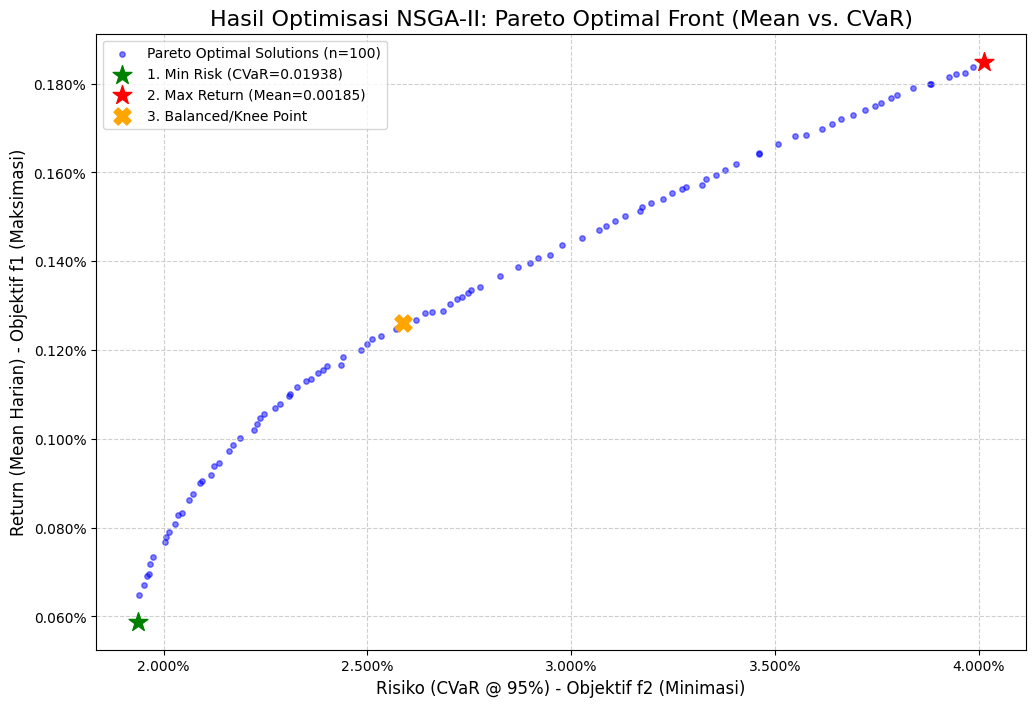


1. Portofolio Risiko Minimum (Paling Konservatif)
  > Mean Return (f1): 0.000588 (Daily)
  > CVaR Risk (f2)  : 0.019378 (Daily @ 95%)

  Komposisi Bobot (di atas 0.5%):
    - ICBP.JK : 29.78%
    - BBCA.JK : 29.70%
    - BYAN.JK : 29.48%
    - ASII.JK : 26.67%
    - TLKM.JK :  7.26%
    - TPIA.JK :  7.01%
    - KLBF.JK :  5.66%
    - ADRO.JK :  5.15%
    - BBNI.JK :  5.03%
    - UNVR.JK :  3.10%
    - BMRI.JK :  3.03%
    - MDKA.JK :  2.20%
    - AMRT.JK :  1.57%
    - BBRI.JK :  0.67%

3. Portofolio Titik Tengah (Balanced/Knee)
  > Mean Return (f1): 0.001261 (Daily)
  > CVaR Risk (f2)  : 0.025867 (Daily @ 95%)

  Komposisi Bobot (di atas 0.5%):
    - BYAN.JK : 28.57%
    - ASII.JK : 13.40%
    - TPIA.JK :  9.94%
    - BBNI.JK :  6.06%
    - ICBP.JK :  5.12%
    - BBCA.JK :  0.67%

2. Portofolio Return Maksimum (Paling Agresif)
  > Mean Return (f1): 0.001849 (Daily)
  > CVaR Risk (f2)  : 0.040121 (Daily @ 95%)

  Komposisi Bobot (di atas 0.5%):
    - BYAN.JK : 27.45%
    - TPIA.JK : 1

In [7]:
from src.visualize import visualize_results

tickers_list = mu_vector.index.to_list()
visualize_results(pareto_front_F=pf_f, pareto_weights_X=pf_w, tickers=tickers_list)